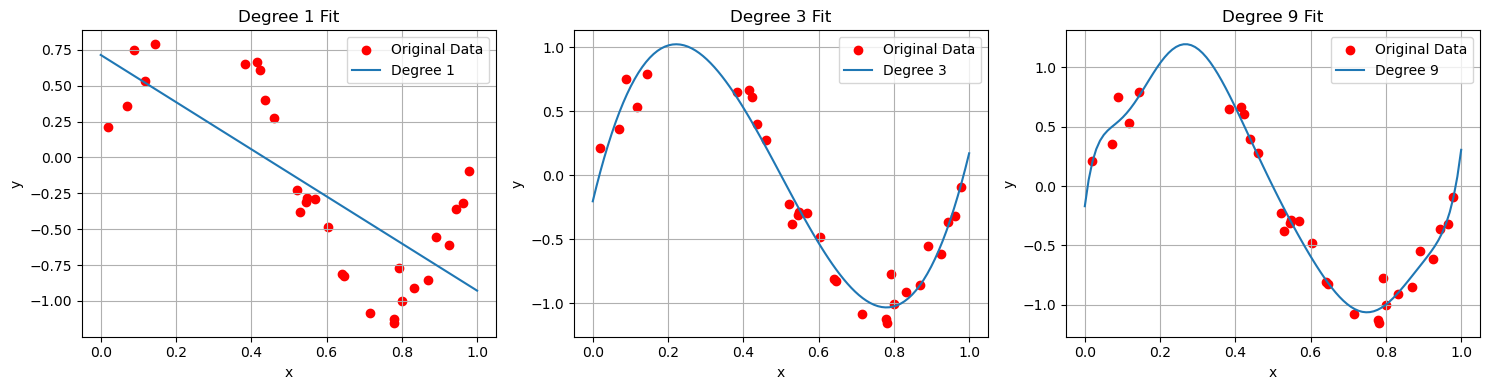

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Generate synthetic sine data with noise
np.random.seed(0)
x = np.sort(np.random.rand(30))
y = np.sin(2 * np.pi * x) + np.random.normal(0, 0.1, x.shape)
x = x[:, np.newaxis]
y = y[:, np.newaxis]

# Degrees to test
degrees = [1, 3, 9]

# Plotting
plt.figure(figsize=(15, 4))
for i, degree in enumerate(degrees, 1):
    poly = PolynomialFeatures(degree)
    x_poly = poly.fit_transform(x)

    model = LinearRegression()
    model.fit(x_poly, y)

    x_plot = np.linspace(0, 1, 100)[:, np.newaxis]
    x_plot_poly = poly.transform(x_plot)
    y_plot = model.predict(x_plot_poly)

    # Subplot for each degree
    plt.subplot(1, 3, i)
    plt.scatter(x, y, color='red', label='Original Data')
    plt.plot(x_plot, y_plot, label=f'Degree {degree}')
    plt.title(f'Degree {degree} Fit')
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


In [2]:
# Create and save a CSV file from code
import pandas as pd

data = {
    "x": [0.01, 0.13, 0.18, 0.27, 0.35, 0.40, 0.52, 0.60, 0.67, 0.75, 0.83, 0.89, 0.95],
    "y": [0.12, 0.75, 0.95, 0.81, 0.55, 0.45, -0.15, -0.58, -0.90, -0.98, -0.68, -0.34, -0.10]
}
#you can edit the x and y values slightly and check the changes
df = pd.DataFrame(data)
df.to_csv("sine_data.csv", index=False)

# Now read it
df = pd.read_csv("sine_data.csv")
print(df.head())

      x     y
0  0.01  0.12
1  0.13  0.75
2  0.18  0.95
3  0.27  0.81
4  0.35  0.55


Dataset:
       x     y
0  0.01  0.12
1  0.13  0.75
2  0.18  0.95
3  0.27  0.81
4  0.35  0.55


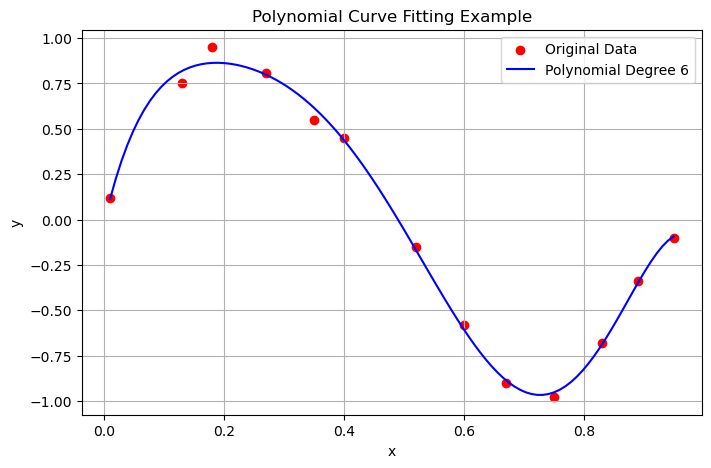

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Step 1: Load the dataset
data = pd.read_csv("sine_data.csv")

# Step 2: View the data
print("Dataset:\n", data.head())

# Step 3: Separate input (x) and output (y)
x = data[['x']].values  # shape (n, 1)
y = data[['y']].values  # shape (n, 1)

# Step 4: Fit a polynomial curve (e.g., degree 3)
degree = 6  #try changing the degree value 1,2,to 9 and check
poly = PolynomialFeatures(degree)
x_poly = poly.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)
y_pred = model.predict(x_poly)

# Step 5: Plot the original data and fitted curve
x_plot = np.linspace(min(x)[0], max(x)[0], 100).reshape(-1, 1)
x_plot_poly = poly.transform(x_plot)
y_plot = model.predict(x_plot_poly)

plt.figure(figsize=(8, 5))
plt.scatter(x, y, color='red', label='Original Data')
plt.plot(x_plot, y_plot, color='blue', label=f'Polynomial Degree {degree}')
plt.title("Polynomial Curve Fitting Example")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()